# Disease classification on PlantVillage

In this chapter, we will design a CNN to perform the plant disease classification task on the PlantVillage dataset. This includes several steps, which are outlined below:

1. Explore and preprocess the PlantVillage dataset
2. Design an isotropic CNN architecture
3. Train the CNN on the PlantVillage dataset
4. Analyze accuracy of the CNN model from the angle of hierarchical confusion matrix

## the PlantVillage dataset

The PlantVillage dataset is a collection of **54,305** images of **14** different plant species, belonging to **38** classes, 12 of which are healthy, 26 of which are diseased.

The dataset was created by the Penn State College of Agricultural Sciences and the International Institute of Tropical Agriculture as a resource for research and development of computer vision-based plant disease detection systems.
The images in the dataset were collected from various sources, including research institutions and citizen scientists, and represent a wide variety of plant species and disease types.

The plants include fruits such as apple, blueberry, cherry, grape, orange, peach, raspberry, squash, strawberry and crops such as corn, soybean and vegetables such as pepper bell, potato, tomato. Each plant is in healthy status or in disease such as scab, rot, rust, and so on.

In [3]:
import pandas as pd
df = pd.read_csv('data/cls_count.csv')
df[['Plant', 'Disease', 'Count']]

,Plant,Disease,Count
0,Apple,Apple_scab,630
1,Apple,Black_rot,621
2,Apple,Cedar_apple_rust,275
3,Apple,healthy,1645
4,Blueberry,healthy,1502
5,Cherry,Powdery_mildew,1052
6,Cherry,healthy,854
7,Corn,Cercospora_leaf_spot Gray_leaf_spot,513
8,Corn,Common_rust,1192
9,Corn,Northern_Leaf_Blight,985


The number of images of all the different types of plants are different with each other. Such a skewed distribution of the number of images in a dataset is called imbalanced. A imbalanced dataset is more difficult to train then a balanced dataset.

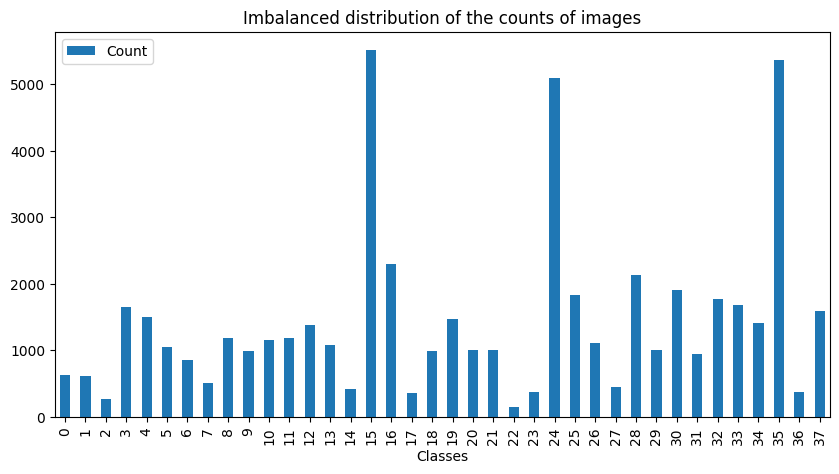

In [20]:
xticks = range(38)
ax = df.plot.bar(
    x='Disease', y='Count', 
    title='Imbalanced distribution of the counts of images',
    xlabel='Classes', xticks=xticks, 
    figsize=(10,5))
legend = ax.legend(loc=2)

Last, let us show example images of 38 classes. You could click the button below to show more examples.

## Hierarchical Confusion Matrix of PlantVillage

A confusion matrix is a visualization tool in machine learning to help people to evaluate the performance of a classification model.
It is a tabular layout that compares predicted class labels against actual class labels over all data instances.
The rows of the matrix represent the actual classes, while the columns represent the predicted classes.
By analyzing the confusion matrix, we can determine how well the model is able to distinguish between different classes, as well as which classes are most often confused with one another.
Popular performance metrics, such as accuracy, precision, recall, F-1 score could be derived from the confusion matrix.

The PlantVillage dataset has a tree-like hierarchical structure with three levels.
The root node is the overall category, plant.
The first level is the 14 specific plant species.
The second level is the healthy or disease status of the particular plant.
Thus we use hierarchical confusion matrix to capture the hierarchical structure in the dataset.

The following is an interactive widget to visualize the hierarchical confusion matrix of the FoldNet model when evaluating on the 10,861 testing images of the PlantVillage dataset.

<iframe src="https://autofarm2.vercel.app/" width="1800" height="1200" allowfullscreen></iframe>

The FoldNet model achieves 99.84% accuracy, with only 17 images are classified incorrectly.
After quantitatively analyzing these 17 images, we find three interesting points need to be noted:

First, compared to incorrect classification within the same species, incorrect classification across species are very rare.
Only 5 images are incorrectly identified as images of different plant species, while the other 12 images are identified correctly as to their species, even though incorrectly as to their disease status.
This reflects the robustness of the FoldNet model, which can correctly predict the species of a image even if its prediction of the image's disease status is wrong.

Second, the 12 images that are incorrectly classified within the same species belong to two species, corn and tomato. 4 of the 12 images belong to corn, while the other 8 images belong to tomato.
This reflects the complexity of the images of corn and tomato.

Third, for the 17 images that are classified incorrectly
